**Análisis de modelos**

**Preparación de datos**

Importamos los datos, preparamos el dataset y creamos los conjuntos de entrenamiento.

Creamos conjuntos de entrenamiento con diferentes algoritmos de oversampling

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from src.data_utils.data_utils import read_data, prepare_dummy_cols, normalize_num_vars
from src.model_utils.utils import boruta_selected_vars

excel_file_path = "D:\\develop\\predict_lapse\\data\\BBDD_Impago_1.0.xlsx"

df = read_data(excel_file_path)

cat_vars = ['Canal', 'Domiciliacion', 'Figuras', 'Motor', 'Pago', 'SegundoConductor', 'Tipo_Furgoneta', 'Tipo_Moto', 'Tipo_Turismo',  'Zonas_Zona1', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

feature_cols = ['Pago', 'Domiciliacion', 'Anyomatricula', 'Prima', 'Valor',
                'ValorVehículo', 'Motor_2', 'Motor_3', 'Canal', 'Socioec', 'Antigüedad', 'Carnet', 'SegundoConductor', 'Figuras', 'Tipo_Moto', 'Tipo_Turismo', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

df_dummy = prepare_dummy_cols(df, ['Tipo', 'Zonas', 'Motor'] )

num_vars = ['Anyomatricula', 'Valor', 'Prima', 'ValorVehículo', 'Socioec','Antigüedad', 'Carnet']

X = df_dummy[feature_cols]
y = df['Impago']

# Importante que la variable objetivo se distribuya en el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train = normalize_num_vars(X_train, num_vars)
X_test = normalize_num_vars(X_test, num_vars)




Aplicamos diferentes alogoritmos de oversampling y comprobamos cómo funcionan con el modelo de regresión logística.

In [14]:
from src.model_utils.oversampling import over_sm, over_adasyn, over_bsm, over_svmsm, over_random

# Generamos los dataset con los diferentes métodos de oversampling
X_train_ro, y_train_ro = over_random(X_train, y_train)
X_train_sm, y_train_sm = over_sm(X_train, y_train)
X_train_adasyn, y_train_adasyn = over_adasyn(X_train, y_train)
X_train_bsm, y_train_bsm = over_bsm(X_train, y_train)
X_train_svmsm, y_train_svmsm = over_svmsm(X_train, y_train, 0.1)



Vamos a probar estos modelos y a evaluarlos pero utilizando Boruta para la selección de variables

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	20
Iteration: 	7 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	1
Rejected: 	20
I

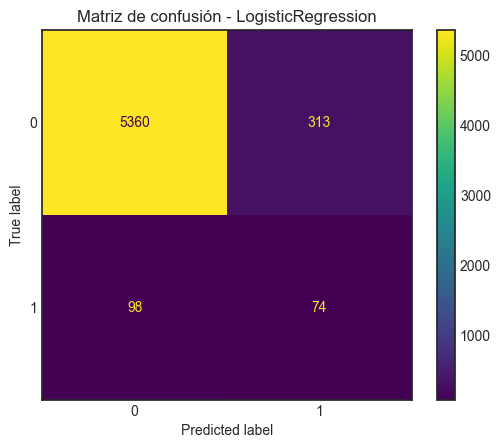


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9820    0.9448    0.9631      5673
           1     0.1912    0.4302    0.2648       172

    accuracy                         0.9297      5845
   macro avg     0.5866    0.6875    0.6139      5845
weighted avg     0.9588    0.9297    0.9425      5845

AUC-ROC (train): 0.7987
AUC-ROC (test) : 0.8048
PR-AUC  (train): 0.2686
PR-AUC  (test) : 0.3226
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	15


BorutaPy finished running.

Iteration: 	7 / 100
Confirmed: 	8
Tentative: 	0
Rejected: 	15
Las variables seleccionadas con Boruta son: Index(['An

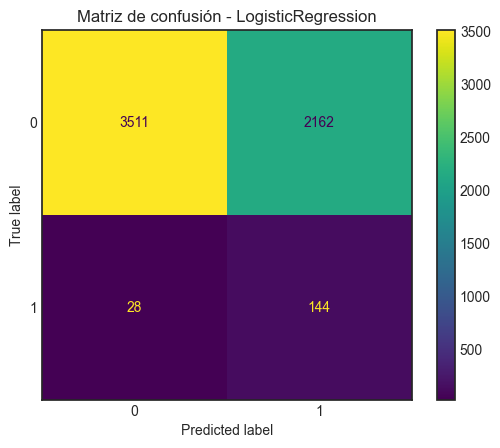


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9921    0.6189    0.7623      5673
           1     0.0624    0.8372    0.1162       172

    accuracy                         0.6253      5845
   macro avg     0.5273    0.7281    0.4392      5845
weighted avg     0.9647    0.6253    0.7433      5845

AUC-ROC (train): 0.8241
AUC-ROC (test) : 0.8253
PR-AUC  (train): 0.6435
PR-AUC  (test) : 0.2913
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	14


BorutaPy finished running.

Iteration: 	7 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	14
Las variables seleccionadas con Boruta son: Index(['An

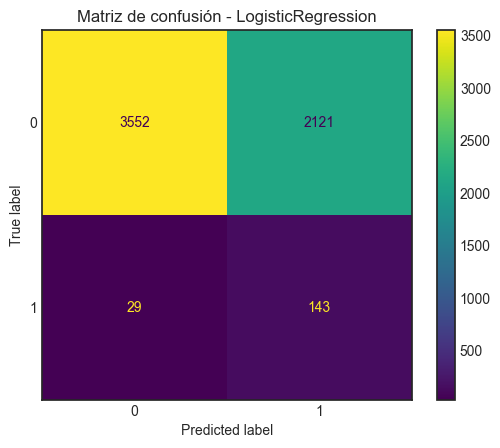


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9919    0.6261    0.7677      5673
           1     0.0632    0.8314    0.1174       172

    accuracy                         0.6322      5845
   macro avg     0.5275    0.7288    0.4425      5845
weighted avg     0.9646    0.6322    0.7485      5845

AUC-ROC (train): 0.8539
AUC-ROC (test) : 0.8201
PR-AUC  (train): 0.7244
PR-AUC  (test) : 0.2824
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	7 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	1
Rejected: 	14
Iteration: 	9 / 100
Co

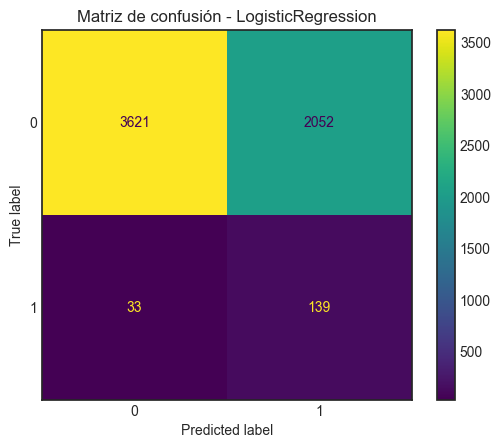


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9910    0.6383    0.7765      5673
           1     0.0634    0.8081    0.1176       172

    accuracy                         0.6433      5845
   macro avg     0.5272    0.7232    0.4471      5845
weighted avg     0.9637    0.6433    0.7571      5845

AUC-ROC (train): 0.8464
AUC-ROC (test) : 0.8161
PR-AUC  (train): 0.7039
PR-AUC  (test) : 0.2587
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	13
Iteration: 	7 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	13
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	13
Iteration: 	9 / 100
Co

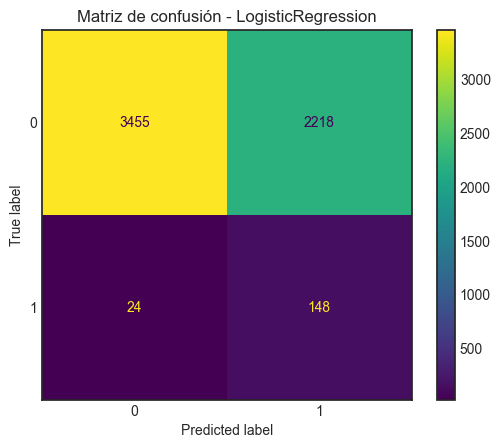


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9931    0.6090    0.7550      5673
           1     0.0626    0.8605    0.1166       172

    accuracy                         0.6164      5845
   macro avg     0.5278    0.7347    0.4358      5845
weighted avg     0.9657    0.6164    0.7362      5845

AUC-ROC (train): 0.8931
AUC-ROC (test) : 0.8271
PR-AUC  (train): 0.7808
PR-AUC  (test) : 0.2609
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	23
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	12


BorutaPy finished running.

Iteration: 	7 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	12
Las variables seleccionadas con Boruta son: Index(['

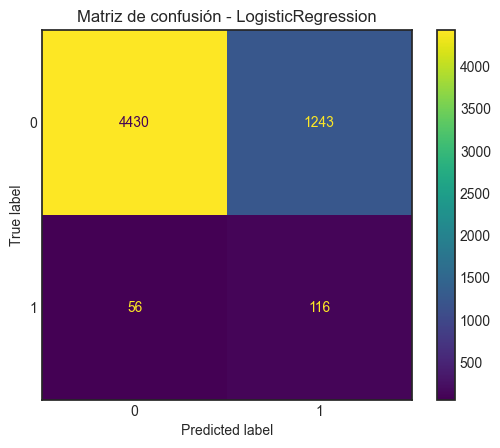


Generando classification report para LogisticRegression:

              precision    recall  f1-score   support

           0     0.9875    0.7809    0.8721      5673
           1     0.0854    0.6744    0.1515       172

    accuracy                         0.7778      5845
   macro avg     0.5364    0.7277    0.5118      5845
weighted avg     0.9610    0.7778    0.8509      5845

AUC-ROC (train): 0.9269
AUC-ROC (test) : 0.8196
PR-AUC  (train): 0.8700
PR-AUC  (test) : 0.3058


In [11]:
from src.model_utils.utils import boruta_selected_vars
from src.model_utils.mod_evaluation import run_model_and_evaluate_reg_log

X_train_selected, X_train_tentative = boruta_selected_vars(X_train, y_train)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
 X_train[X_train_selected], y_train,
    X_test[X_train_selected], y_test
)

X_train_ro_selected, X_train_ro_tentative = boruta_selected_vars(X_train_ro, y_train_ro)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
 X_train_ro[X_train_ro_selected], y_train_ro,
    X_test[X_train_ro_selected], y_test
)

X_train_sm_selected, X_train_sm_tentative = boruta_selected_vars(X_train_sm, y_train_sm)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
 X_train_sm[X_train_sm_selected], y_train_sm,
    X_test[X_train_sm_selected], y_test
)

X_train_adasyn_selected, X_train_adasyn_tentative = boruta_selected_vars(X_train_adasyn, y_train_adasyn)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
X_train_adasyn[X_train_adasyn_selected], y_train_adasyn,
    X_test[X_train_adasyn_selected], y_test
)

X_train_bsm_selected, X_train_bsm_tentative = boruta_selected_vars(X_train_bsm, y_train_bsm)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra = run_model_and_evaluate_reg_log(
X_train_bsm[X_train_bsm_selected], y_train_bsm,
    X_test[X_train_bsm_selected], y_test
)

X_train_svmsm_selected, X_train_svmsm_tentative = boruta_selected_vars(X_train_svmsm, y_train_svmsm)
rf_metrics, roc_auc_dict, fp_id, fn_id, extra= run_model_and_evaluate_reg_log(
X_train_svmsm[X_train_svmsm_selected], y_train_svmsm,
    X_test[X_train_svmsm_selected], y_test
)


In [10]:
from src.model_utils.utils import hyperparameter_tuning
from src.model_utils.mod_evaluation import run_model_and_evaluate
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier


# models = {
#     "Random_Forest": RandomForestClassifier(random_state=42, n_jobs=-1),
#     "GBM_sklearn": GradientBoostingClassifier(random_state=42),
#     "XGBoost": XGBClassifier(random_state=42),
#     "LightGBM": LGBMClassifier(random_state=42),
#     "CatBoost": CatBoostClassifier(random_state=42)
# }

model = RandomForestClassifier(random_state=42, n_jobs=-1)

param_dist_rf = {
    'n_estimators': [500, 600],
    'max_depth': [5,8,12],  # Limitar la profundidad para evitar el sobreajuste
    'min_samples_split': [5, 10, 20],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [4, 8, 10],  # Número mínimo de muestras en las hojas
    'max_features': ['sqrt', 'log2', 0.3]
}

# Parámetros a optimizar para GradientBoosting
param_dist_gbm = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.03, 0.05],
    'max_depth': [2, 3, 4],
    'min_samples_split': [20, 50, 80],
    'min_samples_leaf': [10, 20, 50],
    'subsample': [0.5, 0.7, 0.8],
    "max_features": ["sqrt", "log2"]
}

n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
scale_pos_weight = n_neg / n_pos
scale_pos_weight

# Parámetros a optimizar para XGBoost
param_dist_xgb = {
    'n_estimators': [300, 400, 600],
    'learning_rate': [0.03, 0.05],
    'max_depth': [2, 3, 4],
    'subsample': [0.5, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.8],
    "gamma": [1, 2, 5, 10],
    "reg_lambda": [2, 5, 10, 20],
    "reg_alpha": [0.5, 1, 2],
    "min_child_weight": [10, 20, 30, 50],
    "scale_pos_weight": [scale_pos_weight]
}

param_dist_lgbm = {
    'objetive':["binary"],
    'n_estimators': [400, 500, 600],
    'num_leaves': [15, 25, 30, 45, 63],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_split_gain' : [0.1],
    'max_depth': [4, 6, 8],
    'subsample': [0.6, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.8],
    'min_child_samples': [50, 80, 100],
    'reg_alpha': [0, 0.1, 0.5],  # Regularización L1
    'reg_lambda': [5, 10, 20]  # Regularización L2
}

param_dist_catboost = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],  # Regularización L2
    'bagging_temperature': [0, 0.5, 1]
}

# Crear un diccionario con los parámetros de búsqueda para cada modelo
param_dist = {
    "Random_Forest": param_dist_rf,
    "GBM_sklearn": param_dist_gbm,
    "XGBoost": param_dist_xgb,
    "LightGBM": param_dist_lgbm,
    "CatBoost": param_dist_catboost
}

models_not_smote = ["XGBoost", "LightGBM", "CatBoost"]
best_params_models = []

for name, model in models.items():
    if name not in models_not_smote:
        print(f"\nCalculamos selección de hiperparámetros para el modelo {name} con datos de entrenamiento con Oversampling")
        best_model, random_search, best_params =  hyperparameter_tuning(name, model, param_dist, X_train_bsm, y_train_bsm)
        best_params_models.append({name:best_params})
    else:
        print(f"\nCalculamos selección de hiperparámetros para el modelo {name} con datos de entrenamiento sin Oversampling")
        best_model, random_search, best_params =  hyperparameter_tuning(name, model, param_dist, X_train, y_train)
        best_params_models.append({name:best_params})

print("Mostramos resumen de mejores hiperparámetros")
best_params_models





Calculamos selección de hiperparámetros para el modelo Random_Forest con datos de entrenamiento con Oversampling


KeyboardInterrupt: 

Por último, ejecutamos los modelos con los mejores parámetros conseguidos.


Calculamos el modelo Random_Forest con oversampling Borderline Smote
Mejor umbral elegido ha sido: 0.4171423885287629
Accuracy (train): 0.9758
Accuracy (test) : 0.9441

Generando matriz de confusión para Random_Forest:



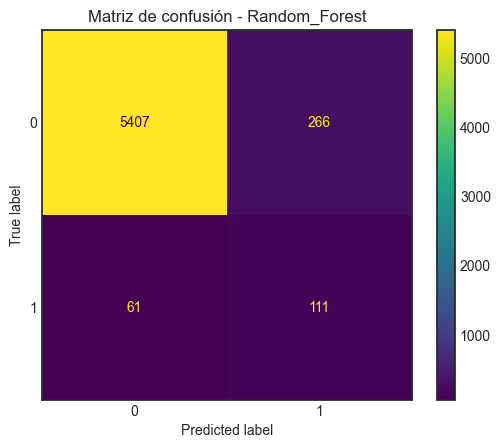


Generando classification report para Random_Forest:

              precision    recall  f1-score   support

           0     0.9888    0.9531    0.9706      5673
           1     0.2944    0.6453    0.4044       172

    accuracy                         0.9441      5845
   macro avg     0.6416    0.7992    0.6875      5845
weighted avg     0.9684    0.9441    0.9540      5845

AUC-ROC (train): 0.9653
AUC-ROC (test) : 0.8789
PR-AUC  (train): 0.6908
PR-AUC  (test) : 0.4589

Calculamos el modelo GBM_sklearn con oversampling Borderline Smote
Mejor umbral elegido ha sido: 0.6617667658877786
Accuracy (train): 0.9754
Accuracy (test) : 0.9617

Generando matriz de confusión para GBM_sklearn:



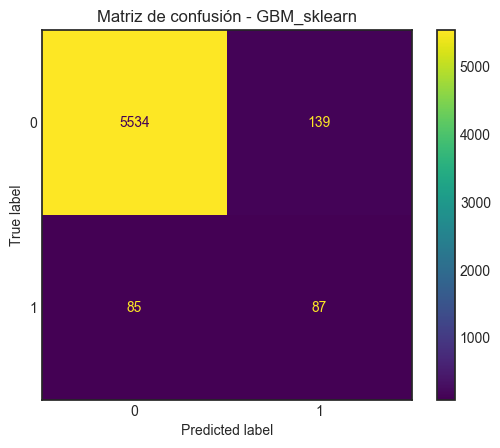


Generando classification report para GBM_sklearn:

              precision    recall  f1-score   support

           0     0.9849    0.9755    0.9802      5673
           1     0.3850    0.5058    0.4372       172

    accuracy                         0.9617      5845
   macro avg     0.6849    0.7407    0.7087      5845
weighted avg     0.9672    0.9617    0.9642      5845

AUC-ROC (train): 0.9080
AUC-ROC (test) : 0.8681
PR-AUC  (train): 0.5287
PR-AUC  (test) : 0.4917

Calculamos el modelo XGBoost sin oversampling
Mejor umbral elegido ha sido: 0.8404748439788818
Accuracy (train): 0.9715
Accuracy (test) : 0.9656

Generando matriz de confusión para XGBoost:



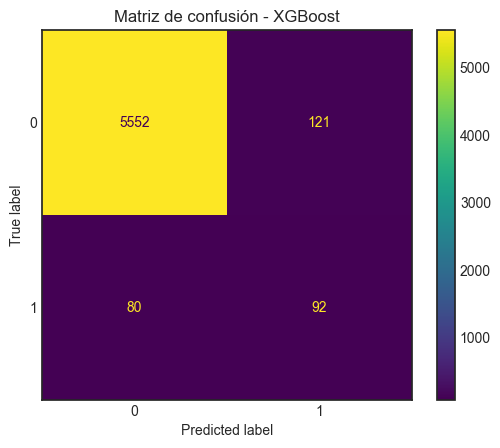


Generando classification report para XGBoost:

              precision    recall  f1-score   support

           0     0.9858    0.9787    0.9822      5673
           1     0.4319    0.5349    0.4779       172

    accuracy                         0.9656      5845
   macro avg     0.7089    0.7568    0.7301      5845
weighted avg     0.9695    0.9656    0.9674      5845

AUC-ROC (train): 0.9815
AUC-ROC (test) : 0.8803
PR-AUC  (train): 0.6898
PR-AUC  (test) : 0.4969

Calculamos el modelo LightGBM sin oversampling
[LightGBM] [Info] Number of positive: 550, number of negative: 18150
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001149 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 700
[LightGBM] [Info] Number of data points in the train set: 18700, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.029412 -> initscore=-3.496508
[LightGBM] [Info] Start training from score 

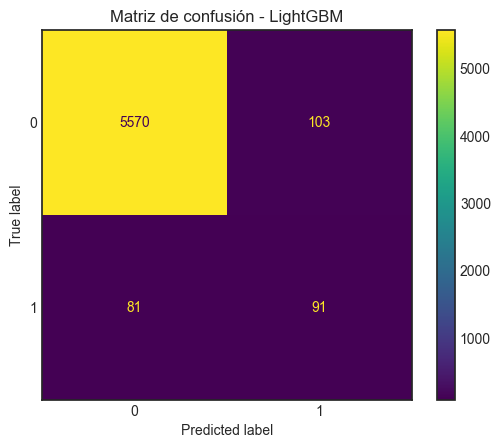


Generando classification report para LightGBM:

              precision    recall  f1-score   support

           0     0.9857    0.9818    0.9838      5673
           1     0.4691    0.5291    0.4973       172

    accuracy                         0.9685      5845
   macro avg     0.7274    0.7555    0.7405      5845
weighted avg     0.9705    0.9685    0.9694      5845

AUC-ROC (train): 0.9862
AUC-ROC (test) : 0.8900
PR-AUC  (train): 0.7262
PR-AUC  (test) : 0.5441

Calculamos el modelo CatBoost sin oversampling
0:	learn: 0.8765617	total: 116ms	remaining: 34.7s
1:	learn: 0.8773193	total: 121ms	remaining: 18.1s
2:	learn: 0.8858193	total: 127ms	remaining: 12.6s
3:	learn: 0.8873136	total: 133ms	remaining: 9.84s
4:	learn: 0.8898157	total: 138ms	remaining: 8.17s
5:	learn: 0.8939575	total: 145ms	remaining: 7.1s
6:	learn: 0.8962040	total: 151ms	remaining: 6.3s
7:	learn: 0.8966409	total: 157ms	remaining: 5.72s
8:	learn: 0.8965751	total: 163ms	remaining: 5.26s
9:	learn: 0.8973218	total: 169ms

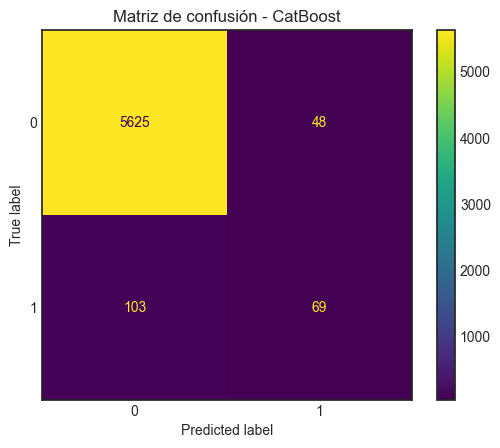


Generando classification report para CatBoost:

              precision    recall  f1-score   support

           0     0.9820    0.9915    0.9868      5673
           1     0.5897    0.4012    0.4775       172

    accuracy                         0.9742      5845
   macro avg     0.7859    0.6964    0.7321      5845
weighted avg     0.9705    0.9742    0.9718      5845

AUC-ROC (train): 0.9609
AUC-ROC (test) : 0.8819
PR-AUC  (train): 0.6102
PR-AUC  (test) : 0.5092


[{'Random_Forest': {'train_accuracy': 0.9758299110198494,
   'test_accuracy': 0.944054747647562,
   'conf_matrix': array([[5407,  266],
          [  61,  111]]),
   'classification_report': '              precision    recall  f1-score   support\n\n           0     0.9888    0.9531    0.9706      5673\n           1     0.2944    0.6453    0.4044       172\n\n    accuracy                         0.9441      5845\n   macro avg     0.6416    0.7992    0.6875      5845\nweighted avg     0.9684    0.9441    0.9540      5845\n'}},
 {'Random_Forest': {'auc-roc-train': 0.9653273813247069,
   'auc-roc-test': 0.8788672577980561,
   'pr-auc-train': 0.6908309524702807,
   'pr-auc-test': 0.4589019952853429}},
 {'GBM_sklearn': {'train_accuracy': 0.9753593429158111,
   'test_accuracy': 0.9616766467065868,
   'conf_matrix': array([[5534,  139],
          [  85,   87]]),
   'classification_report': '              precision    recall  f1-score   support\n\n           0     0.9849    0.9755    0.9802     

In [11]:
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
scale_pos_weight = n_neg / n_pos
scale_pos_weight

models = {
        "Random_Forest": RandomForestClassifier(
            n_estimators=600, random_state=42,
            n_jobs=-1,
            max_depth=12,
            min_samples_leaf=4,
            min_samples_split=5,
            max_features='sqrt',
        ),
        "GBM_sklearn": GradientBoostingClassifier(
            random_state=42,
            subsample=0.5,
            n_estimators=200,
            min_samples_split=80,
            min_samples_leaf=10,
            max_features='sqrt',
            max_depth=4,
            learning_rate=0.05
        ),
        "XGBoost": XGBClassifier(
            random_state=42,
            n_estimators=500,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            gamma=2,
            reg_lambda=20,
            reg_alpha= 0.5,
            min_child_weight=30,
            tree_method="hist",
            scale_pos_weight=scale_pos_weight
        ),
        "LightGBM": LGBMClassifier(
            objective="binary",
            random_state=42,
            n_estimators=300,
            learning_rate=0.02,
            subsample_freq=1,
            max_depth=-1,
            subsample=0.8,
            colsample_bytree=0.8,
            min_child_samples=80,
            scale_pos_weight=scale_pos_weight,
            num_leaves=31,
        ),
        "CatBoost": CatBoostClassifier(
            random_state=42,
            iterations=300,
            learning_rate=0.03,
            depth=6,
            loss_function="Logloss",
            eval_metric="PRAUC",
            bootstrap_type="Bayesian",
            rsm=0.8,
            auto_class_weights="Balanced",
            bagging_temperature=0.5
        )
    }

metrics = []


models_not_smote = ["XGBoost", "LightGBM", "CatBoost"]

for name, model in models.items():

    if name not in models_not_smote:
        print(f"\nCalculamos el modelo {name} con oversampling Borderline Smote")
        rf_metrics, roc_auc_dict, fp_id, fn_id  = run_model_and_evaluate(
                name, model,
                X_train, y_train,
                X_test, y_test, "b_smote", 0.45
            )
        metrics.append({name: rf_metrics})
        metrics.append({name: roc_auc_dict})
    else:
        print(f"\nCalculamos el modelo {name} sin oversampling")
        rf_metrics, roc_auc_dict, fp_id, fn_id  = run_model_and_evaluate(
                name, model,
                X_train, y_train,
                X_test, y_test, None, 0.45
            )
        metrics.append({name: rf_metrics})
        metrics.append({name: roc_auc_dict})


metrics